In [54]:
import pandas as pd
import numpy as np
import yfinance as yf
import riskfolio as rp
import warnings
import matplotlib.pyplot as plt

In [55]:
starts = '2010-01-01'
ends = pd.Timestamp.today().strftime('%Y-%m-%d')

In [68]:
assets = ["AAPL","NVDA",'MSFT','GOOG']
data = yf.download(assets, starts, ends)

[*********************100%%**********************]  4 of 4 completed


In [69]:
returns = data["Adj Close"].pct_change().dropna()

In [70]:
rf_data = yf.download("^IRX", period="1d")
current_rf = rf_data["Adj Close"].iloc[0] / 100  # Convert to decimal (e.g., 0.02 for 2%)
print(current_rf)

[*********************100%%**********************]  1 of 1 completed

0.04514999866485596


In [71]:
method_mu = 'hist'
method_cov = 'hist'
model = 'Classic'
hist = True
rm = 'MV'
obj = 'Sharpe'
rf = current_rf if hist else current_rf

In [73]:
port = rp.Portfolio(returns = returns)
port.assets_stats(methods_mu=method_mu,methods_cov=method_cov)
w = port.optimization(model=model, rm=rm,rf=0, obj=obj,hist=hist)

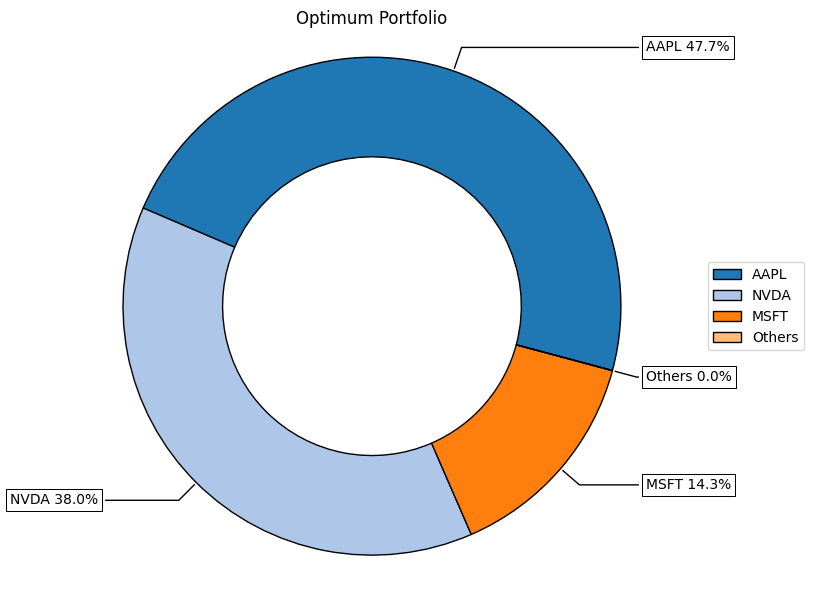

In [74]:
ax = rp.plot_pie(w=w,title="Optimum Portfolio",cmap='tab20')

In [ ]:
rp.excel_report(returns,
                w,
                rf=0,
                alpha=0.05,
                t_factor=252,
                ini_days=1,
                days_per_year=252,
                name="report")